# Description of iris data
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with <b>50 samples</b> each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
-  Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species
Sepal Width vs. Sepal Length



<img src="sepalWidthvsLength.png"  height="700" width="700"/>

<img src="iris_with_labels.jpg" height="300" width="300"/> 



Ref1: https://www.kaggle.com/uciml/iris
Ref2: http://archive.ics.uci.edu/ml/index.php
Ref3: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [111]:
import pandas as pd

# Load Dataset
data = pd.read_csv('Iris.csv')

# First and last five observations or row

In [112]:
data.head(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [113]:
data.tail(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

### Classes in Species

In [114]:
# Our target is 'species' So need to check how many of them
print("Species")
print(data['Species'].unique())

Species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Description 

In [115]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

### Data Classes from original dataset

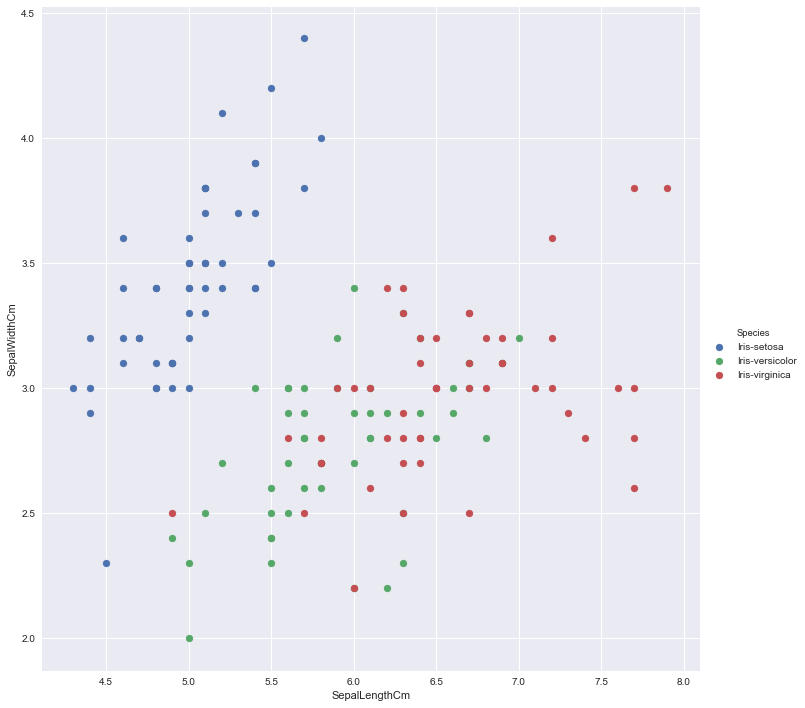

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(data, hue="Species", size=10) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

plt.show()


### Preprocessing Steps: Separating Independent Features and Dependant Feature(Response)

In [117]:
# Preprocessing
# Let Separate Features and Target for machine Learning
# Step1 


features = list(data.columns[1:5])            # SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	
target = data.columns[5]                      # Species

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = data.iloc[:,1:5]                          # slicing: all rows and 1 to 4 cols

# store response vector in "y"
y = data.iloc[:,5]                            # slicing: all rows and 5th col


print(y.shape)
print(X.shape)

Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target: Species
(150,)
(150, 4)


### Converting Response Variable 'Species' to numbers to train model and add column

In [118]:
# Read more: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

# new col
data['EncodedSpecies'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
data.tail(10)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Response variable after encoding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  EncodedSpecies  
140  Iris-virginica               2  
141  Iris-virginica               2  
142  Iris-virginica               2  
143  Iris-virginica               2  
144  Iris-virginica               2  
145  Iris-virginica               2  
146  Iris-virginica               2  
147  Iris-virginica               2  
148  Iris-virginica               2  
149  Iris-virginica               2

# Logistic Regression

In [119]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in column: [3, 5, 4, 2]
logreg.predict([[3, 5, 4, 2]]) # Col vector # See previous result


y_pred = logreg.predict(X)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Classification accuracy #1:

In [120]:

# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


# Evaluation procedure #2: Train/test split

In [121]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


In [122]:
print(X_train.shape)
print(y_train.shape)

(90, 4)
(90,)


# Logistic Regression Model with Train Test split

In [123]:
logres = LogisticRegression(max_iter=3000)
logres.fit(X_train,y_train) # train data


# predict from test
log_pred = logres.predict(X_test)

# check accuracy
import sklearn.metrics as mt
mt.accuracy_score(log_pred,y_test)





0.94999999999999996

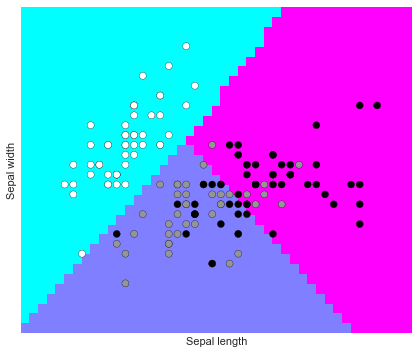

In [124]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

h = 0.1  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.cool)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()